In [1]:
import os

import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras import layers, models

import pickle

import nbimporter

In [2]:
from data_exploration_01 import retrieve_images, transform_image

In [3]:
train_dirs_paths = "../dataset_updated/training_set"
test_dirs_paths = "../dataset_updated/validation_set"

classes = os.listdir(train_dirs_paths)


In [4]:
raw_df = retrieve_images(train_dirs_paths)

Se procesaron 6621 imágenes correctamente.
108 no pudieron ser procesadas por errores en formato.
Se encontraron 1567 imágenes duplicadas


In [6]:
X = np.stack(np.array(raw_df['matriz']), axis=0)
y = np.stack(np.array(raw_df['clase']), axis=0)
filename_paths = np.stack(np.array(raw_df['ruta']))

In [7]:
# Encode class labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

with open("../exports/label_encoder.pickle", "wb") as file:
    pickle.dump(label_encoder, file)

np.save('../exports/X.npy', X)
np.save('../exports/y.npy', y)
np.save('../exports/y_encoded.npy', y_encoded)
np.save('../exports/file_paths.npy', filename_paths)

In [8]:
X = np.load("../exports/X.npy")
y = np.load("../exports/y.npy")
y_encoded = np.load("../exports/y_encoded.npy")

filename_paths = np.load("../exports/file_paths.npy")

with open('../exports/label_encoder.pickle', 'rb') as f:
    label_encoder = pickle.load(f)

In [9]:
def create_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu', name='conv2d_3')(inputs)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_3')(x)

    x = layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_4')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_4')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_5')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_5')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_6')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_6')(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', name='conv2d_7')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_7')(x)

    x = layers.GlobalAveragePooling2D(name='global_average_pooling2d_1')(x)

    x = layers.Dense(128, activation="relu", name='dense_8')(x)

    x = layers.Dense(128, activation="relu", name='dense_9')(x)

    x = layers.Dense(128, activation="relu", name='dense_10')(x)

    x = layers.Dense(128, activation="linear", name='dense_11')(x)

    outputs = layers.Dense(num_classes, activation='softmax', name='dense_12')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [22]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Parameters
input_shape = (150, 150, 3)
num_classes = len(classes)
k = 5  # Number of folds
epochs = 25
batch_size = 32

# Initialize KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Arrays to store results
history_list = []

# Perform K-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y_encoded[train_index], y_encoded[val_index]
    
    model = create_model(input_shape, num_classes)
    
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    history_list.append(history)

Epoch 1/25
166/166 [==============================] - 2s 12ms/step - loss: 1.3432 - accuracy: 0.5198 - val_loss: 1.0148 - val_accuracy: 0.5758
Epoch 2/25
166/166 [==============================] - 2s 11ms/step - loss: 0.9905 - accuracy: 0.6216 - val_loss: 0.9165 - val_accuracy: 0.6777
Epoch 3/25
166/166 [==============================] - 2s 11ms/step - loss: 0.8674 - accuracy: 0.6798 - val_loss: 0.8023 - val_accuracy: 0.7170
Epoch 4/25
166/166 [==============================] - 2s 11ms/step - loss: 0.7850 - accuracy: 0.7058 - val_loss: 0.9038 - val_accuracy: 0.6113
Epoch 5/25
166/166 [==============================] - 2s 11ms/step - loss: 0.7152 - accuracy: 0.7302 - val_loss: 0.7558 - val_accuracy: 0.7336
Epoch 6/25
166/166 [==============================] - 2s 11ms/step - loss: 0.6326 - accuracy: 0.7611 - val_loss: 0.7696 - val_accuracy: 0.7306
Epoch 7/25
166/166 [==============================] - 2s 11ms/step - loss: 0.5707 - accuracy: 0.7829 - val_loss: 0.7225 - val_accuracy: 0.7517

## Gráficos de Precisión y Perdida

In [23]:
# Save training history using pickle
with open('../exports/training_history.pickle', 'wb') as file:
    pickle.dump(history_list, file)

INFO:tensorflow:Assets written to: ram://a7d45bf3-dfa0-4e7b-b6b3-7225f5bb570f/assets


INFO:tensorflow:Assets written to: ram://a7d45bf3-dfa0-4e7b-b6b3-7225f5bb570f/assets


INFO:tensorflow:Assets written to: ram://71ce0af3-485a-451c-9016-0c6631b31bfd/assets


INFO:tensorflow:Assets written to: ram://71ce0af3-485a-451c-9016-0c6631b31bfd/assets


INFO:tensorflow:Assets written to: ram://763ab1ec-a3f6-41f1-a90e-dd20b96c06fe/assets


INFO:tensorflow:Assets written to: ram://763ab1ec-a3f6-41f1-a90e-dd20b96c06fe/assets


INFO:tensorflow:Assets written to: ram://6c65942e-abec-4c09-8d2c-f52cc414c3d8/assets


INFO:tensorflow:Assets written to: ram://6c65942e-abec-4c09-8d2c-f52cc414c3d8/assets


INFO:tensorflow:Assets written to: ram://c83da2ed-1cc4-4f00-8a2a-e3bb730d6fd7/assets


INFO:tensorflow:Assets written to: ram://c83da2ed-1cc4-4f00-8a2a-e3bb730d6fd7/assets


In [16]:
with open('../exports/training_history.pickle', 'rb') as f:
    history_list = pickle.load(f)

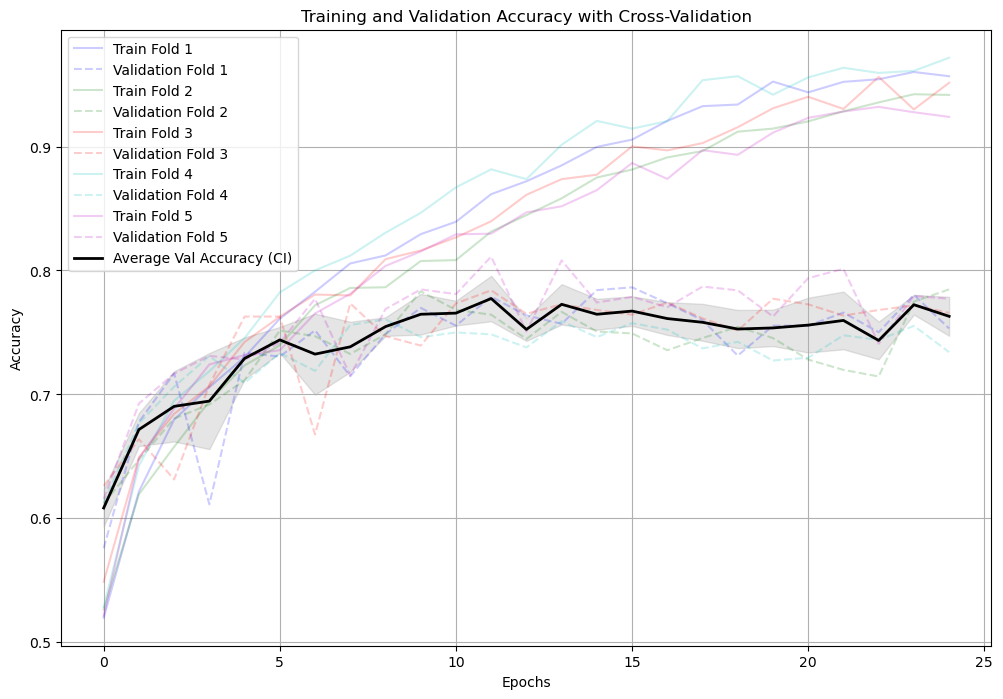

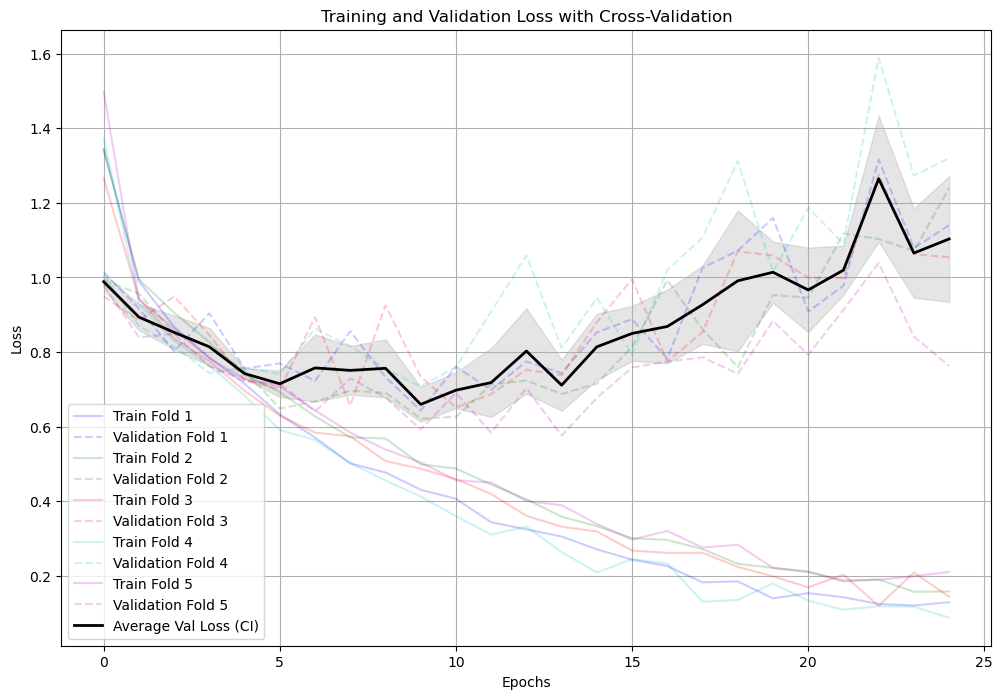

In [24]:
# Plot cross-validation results
def plot_cross_validation_results(history_list, metric='accuracy', ci=True, average_score=True):
    plt.figure(figsize=(12, 8))
    
    # Define a larger list of colors
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'olive']

    # Arrays to store metrics for all folds
    all_metrics = []

    alpha = 0.2 if ci else 1
    
    # Plot training and validation metrics for each fold
    for i, history in enumerate(history_list):
        color = colors[i % len(colors)]  # Cycle through colors
        
        # Plot individual fold metrics
        plt.plot(history.history[metric], label=f'Train Fold {i+1}', color=color, alpha=alpha)
        plt.plot(history.history[f'val_{metric}'], label=f'Validation Fold {i+1}', linestyle="--", color=color, alpha=alpha)
        
        # Store validation metrics for computing average and CI
        all_metrics.append(history.history[f'val_{metric}'])
    
    # Calculate average and confidence interval
    all_metrics = np.array(all_metrics)
    mean_metric = np.mean(all_metrics, axis=0)
    std_metric = np.std(all_metrics, axis=0)
    ci_lower = mean_metric - 1.96 * (std_metric / np.sqrt(len(history_list)))  # 95% confidence interval
    ci_upper = mean_metric + 1.96 * (std_metric / np.sqrt(len(history_list)))  # 95% confidence interval
    
    # Plot average metric with CI lines
    if average_score:
        plt.plot(mean_metric, label=f'Average Val {metric.capitalize()} (CI)', color='k', linewidth=2)
        if ci:
            plt.fill_between(range(len(mean_metric)), ci_lower, ci_upper, color='gray', alpha=0.2)
    
    plt.title(f'Training and Validation {metric.capitalize()} with Cross-Validation')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()
    plt.show()

plot_cross_validation_results(history_list, metric='accuracy', ci=True, average_score=True)
plot_cross_validation_results(history_list, metric='loss')

After 10 epocs the model has no improvement and starts to overfit, hence the model is trained with the data to that stage

In [25]:
model = create_model(input_shape, num_classes)
    
EPOCHS = 10
num_classes = len(classes)
batch_size = 32

history = model.fit(
    X, y_encoded,
    epochs=EPOCHS,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
207/207 [==============================] - 3s 11ms/step - loss: 1.3804 - accuracy: 0.5214
Epoch 2/10
207/207 [==============================] - 2s 10ms/step - loss: 0.9871 - accuracy: 0.6392
Epoch 3/10
207/207 [==============================] - 2s 10ms/step - loss: 0.8639 - accuracy: 0.6759
Epoch 4/10
207/207 [==============================] - 2s 10ms/step - loss: 0.7581 - accuracy: 0.7127
Epoch 5/10
207/207 [==============================] - 2s 10ms/step - loss: 0.6953 - accuracy: 0.7422
Epoch 6/10
207/207 [==============================] - 2s 10ms/step - loss: 0.6211 - accuracy: 0.7657
Epoch 7/10
207/207 [==============================] - 2s 10ms/step - loss: 0.5851 - accuracy: 0.7843
Epoch 8/10
207/207 [==============================] - 2s 10ms/step - loss: 0.5640 - accuracy: 0.7872
Epoch 9/10
207/207 [==============================] - 2s 10ms/step - loss: 0.4967 - accuracy: 0.8141
Epoch 10/10
207/207 [==============================] - 2s 10ms/step - loss: 0.4488 - accura

In [ ]:
# model.save("model.h5")

/home/jucajagu/anaconda3/envs/gpu-terminator/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model = tf.keras.models.load_model('model.h5')

2024-05-27 22:40:42.803175: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:40:43.013313: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:40:43.013392: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:40:43.014795: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-27 22:40:43.014851: I external/local_xla/xla/stream_executor

## Análisis de Separabilidad Embeddings

In [26]:
def create_visual_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(16, (3, 3), activation='relu', name='conv2d_3')(inputs)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_3')(x)

    x = layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_4')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_4')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_5')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_5')(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', name='conv2d_6')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_6')(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', name='conv2d_7')(x)
    x = layers.MaxPooling2D((2, 2), name='max_pooling2d_7')(x)

    x = layers.GlobalAveragePooling2D(name='global_average_pooling2d_1')(x)

    x = layers.Dense(128, activation="relu", name='dense_8')(x)

    x = layers.Dense(128, activation="relu", name='dense_9')(x)

    x = layers.Dense(128, activation="relu", name='dense_10')(x)

    x = layers.Dense(3, activation="linear", name='dense_11')(x)

    outputs = layers.Dense(num_classes, activation='softmax', name='dense_12')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [27]:
visual_model = create_visual_model(input_shape, num_classes)

visual_model.fit(
    X, y_encoded,
    epochs=EPOCHS,
    batch_size=batch_size,
)

Epoch 1/10
207/207 [==============================] - 2s 11ms/step - loss: 1.4270 - accuracy: 0.5153
Epoch 2/10
207/207 [==============================] - 2s 10ms/step - loss: 1.0191 - accuracy: 0.6155
Epoch 3/10
207/207 [==============================] - 2s 10ms/step - loss: 0.9072 - accuracy: 0.6519
Epoch 4/10
207/207 [==============================] - 2s 11ms/step - loss: 0.8451 - accuracy: 0.6775
Epoch 5/10
207/207 [==============================] - 2s 10ms/step - loss: 0.8136 - accuracy: 0.6978
Epoch 6/10
207/207 [==============================] - 2s 10ms/step - loss: 0.7239 - accuracy: 0.7378
Epoch 7/10
207/207 [==============================] - 2s 10ms/step - loss: 0.6664 - accuracy: 0.7564
Epoch 8/10
207/207 [==============================] - 2s 10ms/step - loss: 0.6142 - accuracy: 0.7822
Epoch 9/10
207/207 [==============================] - 2s 10ms/step - loss: 0.5655 - accuracy: 0.7907
Epoch 10/10
207/207 [==============================] - 2s 10ms/step - loss: 0.5288 - accura

In [28]:
sub_network = models.Model(inputs=visual_model.input, outputs=visual_model.layers[-2].output)
sub_network.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        184

In [29]:
vector_prediction = sub_network.predict(X)
vector_prediction

207/207 [==============================] - 1s 2ms/step


array([[-0.77073294, -6.4296803 ,  3.0233955 ],
       [-0.71815807, -4.40598   ,  4.4015265 ],
       [ 0.5065547 , -1.3650914 ,  1.0695573 ],
       ...,
       [-4.543414  ,  2.2291737 ,  4.241138  ],
       [-3.49929   ,  1.9034652 ,  2.2638867 ],
       [-6.6770616 ,  7.6531506 ,  3.4422824 ]], dtype=float32)

In [30]:
x_vector, y_vector, z_vector = vector_prediction[:,0], vector_prediction[:,1], vector_prediction[:,2]

fig = px.scatter_3d(x=x_vector, y=y_vector, z=z_vector, color=y, opacity=0.4)
fig.update_traces(marker_size=5)

## Test Unitarios

1/1 [==============================] - 0s 13ms/step
Predicted Class Label: drawings
Probability Prediction: 0.69


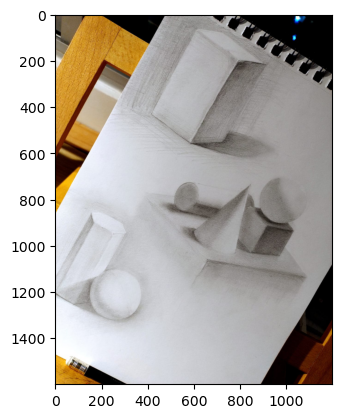

In [35]:
test_image_path = '../unitary_tests/test.jpg'
test_image = transform_image(test_image_path)
test_image = np.expand_dims(test_image, axis=0) 

test_instance_prediction = model.predict(test_image)

predicted_label_encoded = np.argmax(test_instance_prediction, axis=1)[0]  # Get the index of the highest probability

predicted_label = label_encoder.inverse_transform([predicted_label_encoded])[0]  # Inverse transform to get the class label

print("Predicted Class Label:", predicted_label)
print("Probability Prediction:", np.round(np.max(test_instance_prediction), 2))

im = Image.open(test_image_path)
plt.imshow(np.asarray(im))

In [36]:
neighbors_sub_network = models.Model(inputs=model.input, outputs=model.layers[-2].output)
neighbors_sub_network.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        184

In [37]:
neighbors_sub_network.save("neighbor_model.h5")

In [38]:
neighbors_sub_network = tf.keras.models.load_model('neighbor_model.h5')

In [39]:
neighbors_matrix = neighbors_sub_network.predict(X)

207/207 [==============================] - 1s 2ms/step


In [40]:
# Reshape y to be (6621, 1) and ensure it is treated as strings
y = y.astype(str).reshape(-1, 1)

# Ensure filename_paths is a column vector with shape (6621, 1)
filename_paths = filename_paths.reshape(-1, 1)

# Concatenate the arrays along the second axis
embedding_images = np.concatenate([neighbors_matrix, y, filename_paths], axis=1)

# Convert the concatenated array to a DataFrame
embedding_images_df = pd.DataFrame(embedding_images)

embedding_images_df.to_csv("embedding_images.csv")

In [41]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5).fit(neighbors_matrix)

In [42]:
test_vector = neighbors_sub_network.predict(test_image)
test_vector

1/1 [==============================] - 0s 11ms/step


array([[ 0.19152777,  0.2534497 , -0.06770459,  0.41107407, -0.6564226 ,
        -0.35607004, -0.7329447 , -0.17002736,  0.01120578, -0.41931015,
         0.05655416, -0.10194004, -0.46767354,  0.12374995,  0.06474445,
        -0.04039866, -0.27486295, -0.22503258,  0.02094953, -0.19431959,
        -0.4611322 , -0.21998926, -0.01410091,  0.16456257, -0.23695177,
        -0.03476512,  0.62032574,  0.32066852,  0.07354823,  0.5386398 ,
        -0.04186646,  0.04982816, -0.0342751 ,  0.27784997,  0.2512724 ,
        -0.53199816, -0.3789286 , -0.08817684, -0.11657164, -0.21866138,
        -0.24949165,  0.13790862,  0.0508448 , -0.43540403,  0.12634063,
        -0.39538097,  0.41008505,  0.72976196,  0.08142029, -0.2814829 ,
        -0.41627207, -0.02993889, -0.15616626,  0.15410602,  0.00974274,
        -0.29801583, -0.21084327,  0.15381318,  0.66150993,  0.32071763,
        -0.07527074,  0.11812739,  0.36442938,  0.21871078,  0.19291927,
        -0.55750936,  0.04299034,  0.11781757, -0.6

In [43]:
_, indices = nbrs.kneighbors(test_vector)

['../dataset_updated/training_set\\drawings\\i - 1013.jpeg']
['../dataset_updated/training_set\\drawings\\images (78).jpeg']
['../dataset_updated/training_set\\drawings\\i - 765.jpeg']
['../dataset_updated/training_set\\drawings\\i - 951.jpeg']
['../dataset_updated/training_set\\drawings\\i - 1153.jpeg']


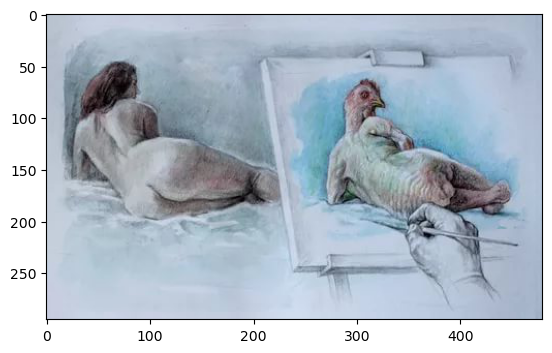

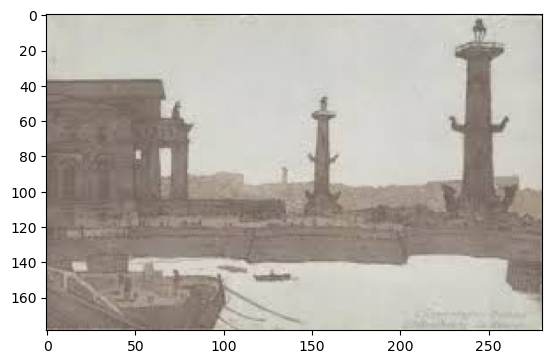

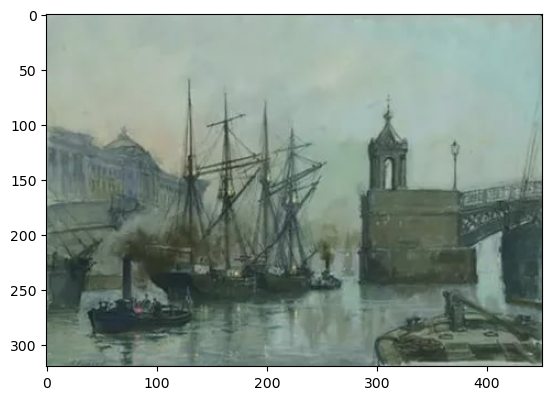

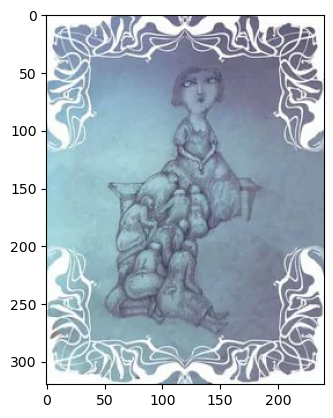

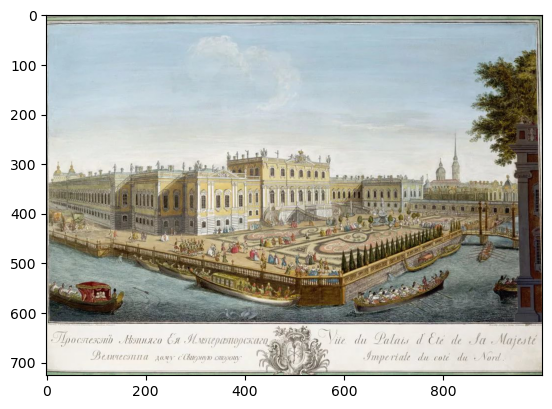

In [48]:
for index in indices.squeeze():
    image = Image.open(filename_paths[:,0][index])
    print(filename_paths[index])
    plt.figure()
    plt.imshow(np.asarray(image))

In [53]:
df_val = retrieve_images(test_dirs_paths)

X_test = np.stack(np.array(df_val['matriz']), axis=0)
y_test = np.stack(np.array(df_val['clase']), axis=0)

# Encode class labels as integers
y_test_encoded = label_encoder.transform(y_test)

print(f"Shape of X: {X_test.shape}")
print(f"Shape of y: {y_test_encoded.shape}")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Se procesaron 845 imágenes correctamente.
8 no pudieron ser procesadas por errores en formato.
Se encontraron 40 imágenes duplicadas
Shape of X: (845, 150, 150, 3)
Shape of y: (845,)
27/27 [==============================] - 0s 10ms/step - loss: 0.5187 - accuracy: 0.8107
Test Loss: 0.5187103748321533
Test Accuracy: 0.8106508851051331


In [54]:
base_path = "../dataset_updated/training_set"

file_sizes = dict() 

for dir_ in os.listdir(base_path):
    file_sizes[dir_] = len(os.listdir(os.path.join(base_path, dir_)))

In [55]:
file_sizes

{'drawings': 1125,
 'engraving': 785,
 'iconography': 2134,
 'painting': 2359,
 'sculpture': 1893}

In [56]:
np.array(list(file_sizes.values()))  / sum(file_sizes.values())

array([0.13560752, 0.09462392, 0.2572324 , 0.28435391, 0.22818226])